# Project 01
## Do students who find office hours effective find the class to be less difficult?

In [2]:
__author__ = "730448488"

### Autoreload code cell

In [3]:
%reload_ext autoreload
%autoreload 2

### Importing the csv as a column-oriented table

In [51]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)


### Selecting relevant data: prior_time and difficulty
In order to do this I will select the two columns and then convert them into their own lists. The head for the two dictionaries is shown

In [77]:
from data_utils import select, head, count

oh_table: dict[str, list[str]] = select(columns, ["oh_effective"])
difficulty: dict[str, list[str]] = select(columns, ["difficulty"])
# tabulate(social_hours, work_hours, "html")
oh_list: list[str] = []
diff_list: list[int] =[]

total_dict: dict[str, list] = {}
total_dict['oh_list'] = oh_list
total_dict['diff_list'] = diff_list



for i in difficulty["difficulty"]:
    diff_list.append(int(i))

for i in oh_table["oh_effective"]:
    oh_list.append(str(i))

head(total_dict, 1)

{'oh_list': ['5'], 'diff_list': [5]}

### Ensure that the blank entries and their corresponding values were correctly deleted

In [79]:
counts_diff = count(diff_list)
print(counts_diff)
counts_oh = count(oh_list)
counts_oh

{5: 158, 3: 54, 6: 112, 4: 120, 7: 86, 2: 32, 1: 11}


{'5': 66, '': 203, '7': 124, '3': 18, '4': 72, '2': 13, '6': 73, '1': 4}

### Removing blank lines
Because oh_effective was not a required entry, I will create a function to remove all the values in oh_list and the corresponding diff_list entry where there is no oh_effective value. The function is then called.

In [11]:
def remove_corresponding_blank(list1: list[str], list2: list[int]) -> None:
    """A function that removes blanks from list1 and removes the corresponding entry at the index in list2"""
    i = 0
    while i<len(oh_list):
        if oh_list[i] == '':
            oh_list.pop(i)
            diff_list.pop(i)
        i += 1
remove_corresponding_blank(oh_list, diff_list)


### Creating a counting dictionary
This dictionary will have the possible answers to oh_effective as the keys and the values as a list of the corresponding difficulty responses.

In [23]:
data = {'1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': []}
i = 0
while i<len(oh_list):
    data[oh_list[i]].append(diff_list[i])
    i += 1

### Finding the averages
Next, we will average the values for each of the keys in the data dictionary. This represents the average difficulty of each oh_effective rating.

In [66]:
data_avg = {}

for key in data:
    data_avg[key] = sum(data[key]) / len((data[key]))

### Graphs

,Average perceived difficulty
1,5.500000
2,6.000000
3,5.388889
4,4.736111
5,5.106061
6,5.205479
7,5.016129


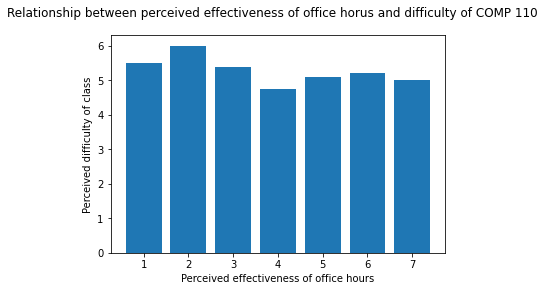

In [76]:
import matplotlib.pyplot as plt
import pandas as pd


fig = plt.figure()
fig.suptitle("Relationship between perceived effectiveness of office horus and difficulty of COMP 110")
plt.xlabel('Perceived effectiveness of office hours')
plt.ylabel('Perceived difficulty of class')
keys = data_avg.keys()
values = data_avg.values()
plt.bar(keys, values)


pd.DataFrame.from_dict(data_avg, orient='index', columns = ['Average perceived difficulty'])

### Conclusion
There does not appear to be any correlation between perceived effectiveness of office hours and the perceived difficulty of COMP 110. There is a very slight decrease in difficulty when perceived effectiveness increases but it is too slight to draw any conclusions from. The delta in difficulty from the lowest perceived effectiveness of office hours to highest is .4838 which is a very small difference. 